# Deal with Imbalanced Classes Problem

Imbalanced classes are a common problem in machine learning classification where there are an unbalanced ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.

In this guide, we'll look at 3 possible ways to handle an imbalanced class problem using credit card data. Our objective will be to correctly classify the minority class of fraudulent transactions.

<img src='https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png'>

## Table of contents
1. Imbalanced classess detection
2. Downsampling or Undersampling Majority Class 
3. Upsamling or Oversampling by generating Synthetic Samples with SMOTE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('../dastasets/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,26319,1.251094,-0.619682,1.421619,0.495537,-1.721549,-0.296483,-1.207151,0.135690,-0.181842,...,-0.114985,0.125850,0.014034,0.315620,0.218096,-0.249817,0.093594,0.047930,20.00,0
14995,26319,1.139049,0.078237,0.480345,0.471539,-0.271098,-0.195209,-0.108635,0.087148,-0.189344,...,-0.169569,-0.544291,0.139743,0.007989,0.101150,0.105698,-0.021173,0.008139,19.99,0
14996,26322,1.297527,0.290501,-0.157129,0.300362,0.275047,-0.075184,-0.028201,0.006493,-0.178580,...,-0.310852,-0.915030,-0.029196,-0.872330,0.349254,0.148786,-0.026891,0.009091,0.89,0
14997,26322,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,...,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,8.99,0


## 1) Imbalanced classess detection

In [3]:
df['Class'].value_counts()

0    14938
1       61
Name: Class, dtype: int64

In [4]:
df['Class'].value_counts() * 100 / len(df)

0    99.593306
1     0.406694
Name: Class, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

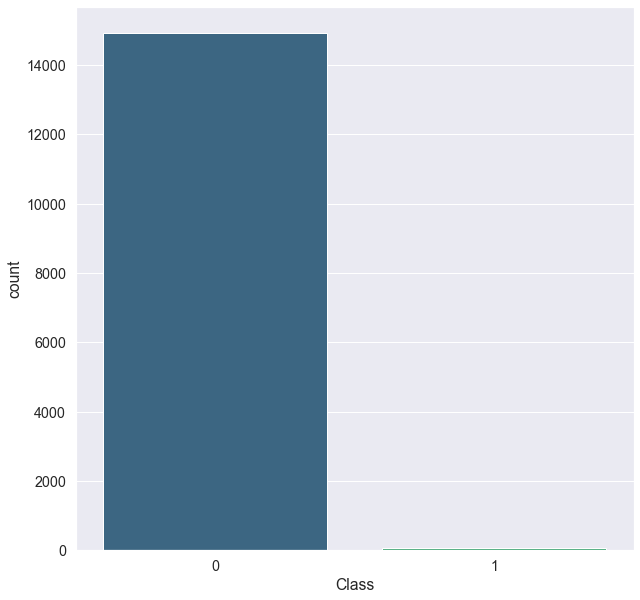

In [5]:
sns.countplot(x='Class', data=df, palette='viridis')

## 2) Downsampling or Undersampling Majority Class

In [6]:
from imblearn.under_sampling import RandomUnderSampler

x = df.drop('Class', axis=1)
y = df['Class']

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

sm = RandomUnderSampler(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [7]:
y_train.value_counts()

1    42
0    42
Name: Class, dtype: int64

## 3) Upsamling or Oversampling by generating Synthetic Samples with SMOTE

<img src='https://miro.medium.com/max/1968/1*Uix18ehXJDGOX4Iu7vrdnQ.png'>

SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

**to install `imbalanced-learn` use this command**

`conda install -c conda-forge imbalanced-learn`

In [8]:
from imblearn.over_sampling import SMOTE

x = df.drop('Class', axis=1)
y = df['Class']

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [9]:
y_train.value_counts()

1    11207
0    11207
Name: Class, dtype: int64

# Great Work!